In [101]:


from typing_extensions import TypedDict


In [102]:
class State(TypedDict):
    graph_state: str
    

In [103]:
def n1(state: State) -> State:
    print(state.get("graph_state"))
    return {"graph_state": "Hello my name is"}

def n1a(state: State) -> State:
    print(state.get("graph_state"))
    return {"graph_state": "What"}

def n1b(state: State) -> State:
    print(state.get("graph_state"))
    return {"graph_state": "Who"}

def n1c(state: State) -> State:
    print(state.get("graph_state"))
    return {"graph_state": "Slim Shady"}

def n1d(state: State) -> State:
    print(state.get("graph_state"))
    return {"graph_state": "Eminem"}


In [104]:
import random
from typing import Literal

def whoami(state: State) -> Literal["n1a", "n1b", "n1c", "n1d"]:
    return random.choice(["n1a", "n1b", "n1c", "n1d"])

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


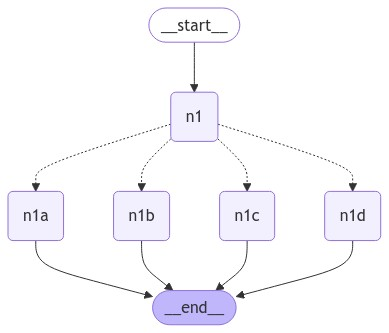

In [105]:

%pip install langgraph


from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("n1", n1)
builder.add_node("n1a", n1a)
builder.add_node("n1b", n1b)
builder.add_node("n1c", n1c)
builder.add_node("n1d", n1d)

builder.add_edge(START, "n1")
builder.add_edge("n1a", END)
builder.add_edge("n1b", END)
builder.add_edge("n1c", END)
builder.add_edge("n1d", END)
builder.add_conditional_edges("n1", whoami)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


In [106]:
for i in range(10):
    res = graph.invoke({"graph_state": "Can I have the attention of the class for one second?"}).get("graph_state")
    print(res)



Can I have the attention of the class for one second?
Hello my name is
What
Can I have the attention of the class for one second?
Hello my name is
Who
Can I have the attention of the class for one second?
Hello my name is
Who
Can I have the attention of the class for one second?
Hello my name is
Slim Shady
Can I have the attention of the class for one second?
Hello my name is
Who
Can I have the attention of the class for one second?
Hello my name is
Who
Can I have the attention of the class for one second?
Hello my name is
Slim Shady
Can I have the attention of the class for one second?
Hello my name is
Who
Can I have the attention of the class for one second?
Hello my name is
What
Can I have the attention of the class for one second?
Hello my name is
Who
